In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configure seaborn
sns.set(style="whitegrid")

# detect repo root
REPO = Path.cwd().parents[0] if "notebooks" in str(Path.cwd()) else Path.cwd()
DATA_PROCESSED = REPO / "data" / "processed" / "mimic_cleaned.csv"

print("Repo root:", REPO)
print("Data:", DATA_PROCESSED)

Repo root: c:\lab-lens\data-pipeline
Data: c:\lab-lens\data-pipeline\data\processed\mimic_cleaned.csv


In [2]:
df = pd.read_csv(DATA_PROCESSED)

print("Loaded shape:", df.shape)
df.head()

Loaded shape: (5000, 17)


,subject_id,hadm_id,gender,ethnicity,insurance,language,marital_status,admission_type,age_at_admission,cleaned_text,text_chars,text_tokens,lab_summary,total_labs,abnormal_lab_count,diagnosis_count,top_diagnoses
0,58526,100001,F,WHITE,Private,ENGL,DIVORCED,EMERGENCY,35,Admission Date: Discharge Date: Date of Birth:...,7698,1215,Phosphate; INR(PT); Platelet Count; Anion Gap;...,268.0,89.0,16,"25013, 3371, 5849, 5780, V5867"
1,54610,100003,M,WHITE,Private,ENGL,SINGLE,EMERGENCY,60,Admission Date: Discharge Date: Date of Birth:...,9078,1444,Bacteria; Magnesium; Lactate; pCO2; Ammonia; A...,226.0,113.0,9,"53100, 2851, 07054, 5715, 45621"
2,9895,100006,F,BLACK/AFRICAN AMERICAN,Private,UNKNOWN,SINGLE,EMERGENCY,49,Admission Date: Discharge Date: Date of Birth:...,5439,880,Sodium; MCH; PT; RDW; White Blood Cells; Oxyge...,402.0,148.0,9,"49320, 51881, 486, 20300, 2761"
3,23018,100007,F,WHITE,Private,UNKNOWN,MARRIED,EMERGENCY,74,Admission Date: Discharge Date: Date of Birth:...,7189,1089,Lipase; Specific Gravity; MCV; Urine Appearanc...,235.0,44.0,5,"56081, 5570, 9973, 486, 4019"
4,533,100009,M,WHITE,Private,UNKNOWN,MARRIED,EMERGENCY,61,Admission Date: Discharge Date: Date of Birth:...,9898,1518,Sodium; MCHC; Free Calcium; Glucose; pCO2; pO2...,247.0,80.0,18,"41401, 99604, 4142, 25000, 27800"


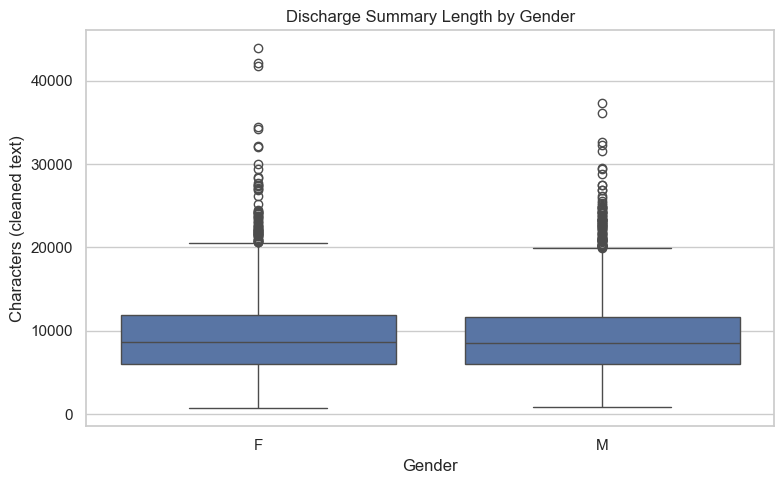

✅ Saved plot -> c:\lab-lens\data-pipeline\logs\bias_plots\text_length_by_gender.png


In [3]:
# === Bias Plot 1: Text length by gender ===
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure output directory exists
PLOTS_DIR = REPO / "logs" / "bias_plots"
PLOTS_DIR.mkdir(parents=True, exist_ok=True)
out_path = PLOTS_DIR / "text_length_by_gender.png"

ycol = "cleaned_length" if "cleaned_length" in df.columns else "text_chars"

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="gender", y=ycol)
plt.title("Discharge Summary Length by Gender")
plt.xlabel("Gender")
plt.ylabel("Characters (cleaned text)")
plt.tight_layout()
plt.savefig(out_path, dpi=200)
plt.show()

print(f"✅ Saved plot -> {out_path}")


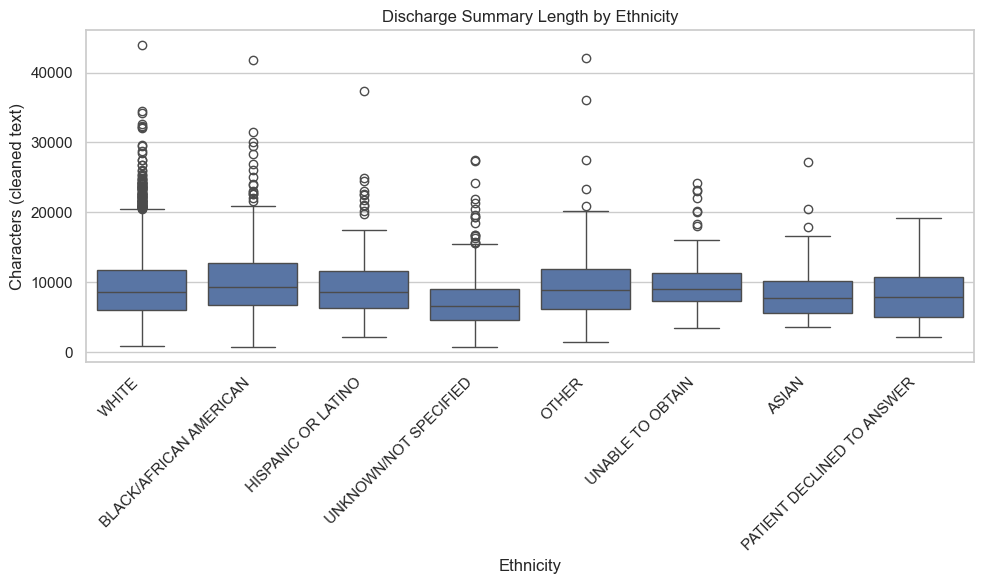

✅ Saved plot -> C:\lab-lens\data-pipeline\logs\bias_plots\text_length_by_ethnicity.png


In [4]:
# === Bias Plot 2: Text length by ethnicity ===

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

PLOTS_DIR = REPO / "logs" / "bias_plots"
PLOTS_DIR.mkdir(parents=True, exist_ok=True)
out_path = PLOTS_DIR / "text_length_by_ethnicity.png"

# keep only top 8 ethnicities for readability
top_eth = df["ethnicity"].value_counts().index[:8]
subset = df[df["ethnicity"].isin(top_eth)]

ycol = "cleaned_length" if "cleaned_length" in df.columns else "text_chars"

plt.figure(figsize=(10,6))
sns.boxplot(data=subset, x="ethnicity", y=ycol)
plt.title("Discharge Summary Length by Ethnicity")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Ethnicity")
plt.ylabel("Characters (cleaned text)")
plt.tight_layout()
plt.savefig(out_path, dpi=200)
plt.show()

print(f"✅ Saved plot -> {out_path.resolve()}")


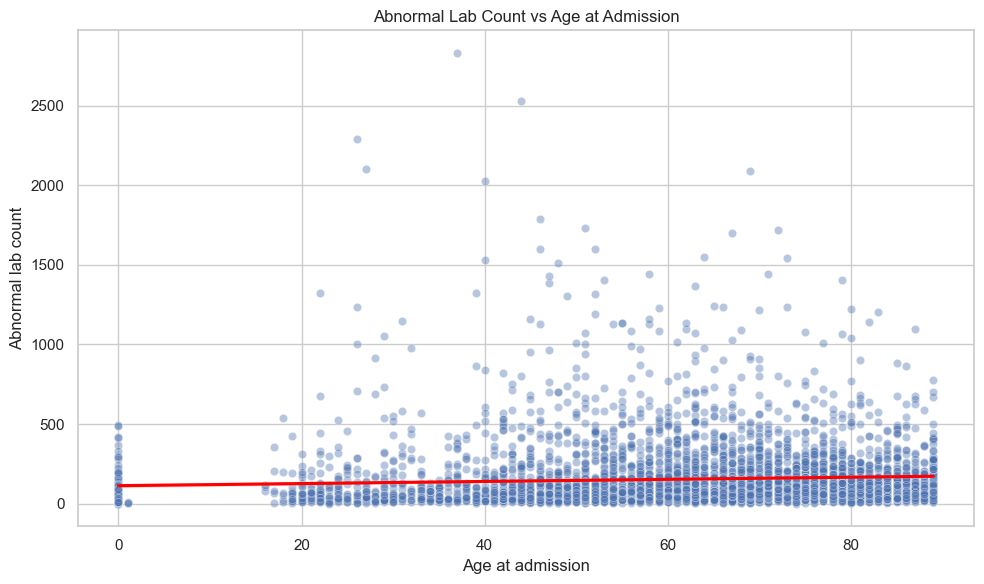

✅ Saved plot -> C:\lab-lens\data-pipeline\logs\bias_plots\abnormal_labs_by_age.png


In [5]:
# === Bias Plot 3: Abnormal lab counts by Age ===

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

PLOTS_DIR = REPO / "logs" / "bias_plots"
PLOTS_DIR.mkdir(parents=True, exist_ok=True)
out_path = PLOTS_DIR / "abnormal_labs_by_age.png"

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="age_at_admission", y="abnormal_lab_count", alpha=0.4)
sns.regplot(data=df, x="age_at_admission", y="abnormal_lab_count", scatter=False, color="red")

plt.title("Abnormal Lab Count vs Age at Admission")
plt.xlabel("Age at admission")
plt.ylabel("Abnormal lab count")
plt.tight_layout()
plt.savefig(out_path, dpi=200)
plt.show()

print(f"✅ Saved plot -> {out_path.resolve()}")
